In [1]:
import numpy as np 
import pandas as pd 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load Iris Data

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

Reference: https://www.kaggle.com/uciml/iris

In [2]:
# Load Iris data set
iris = pd.read_csv("Iris.csv")

# Understanding the data

In [3]:
iris.head(n=5) # List first five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Uncomment the relevant code lines below and execute to print more description about the data

In [4]:
# Information about the data

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Get the data shape
iris.shape
# 150 rows, 6 columns

(150, 6)

In [6]:
# List columns
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# List counts
iris.count()
# Each column & row is full

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [8]:
# Print basic statistics of the data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
# Iris dataset has three species. Let us find their names. 
print(iris['Species'].unique())
# 3 unique species

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [10]:
# Print statistics of Iris-setosa
iris[iris["Species"] == "Iris-setosa"].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


In [11]:
###########################################################################################
# Practice task: Print statistics of 'Iris-versicolor' here and compare with 'Iris-setosa'
###########################################################################################
iris[iris["Species"] == "Iris-versicolor"].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [12]:
###########################################################################################
# Practice task: Print statistics of 'Iris-virginica' here and compare with the other two species
###########################################################################################
iris[iris["Species"] == "Iris-virginica"].describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


In [13]:
# Let us find out how dataset attributes are correlated with each other
X = iris.iloc[:, 1:5] #all but Id column
corr = X.corr()
print(corr)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<AxesSubplot:>

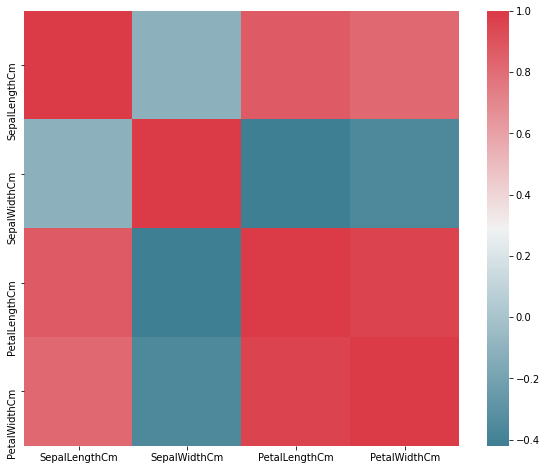

In [14]:
# We can also visualize this correlation table that we generated
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

# We will do more on data visualization next week!

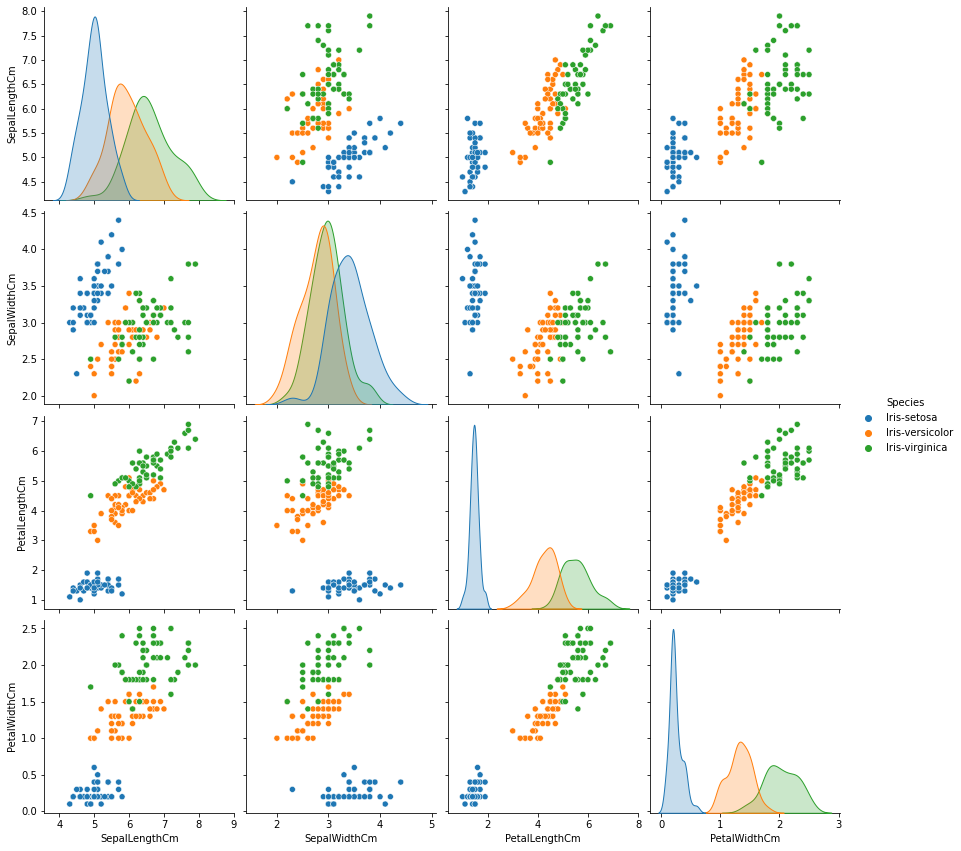

In [15]:
# You can try pair plot 
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=3)

# Principal Component Analysis

PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(X)

PCA(n_components=4)

### pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension

In [17]:
print('Explained variance', pca.explained_variance_) 
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative', pca.explained_variance_ratio_.cumsum())

Explained variance [4.22484077 0.24224357 0.07852391 0.02368303]
Explained variance ratio: [0.92461621 0.05301557 0.01718514 0.00518309]
Cumulative [0.92461621 0.97763178 0.99481691 1.        ]


### Let us see the correlation between the four variables and the four components.

In [18]:
components = pd.DataFrame(pca.components_, columns = X.columns, index=[1, 2, 3, 4])
components

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,0.361590,-0.082269,0.856572,0.358844
2,0.656540,0.729712,-0.175767,-0.074706
3,-0.580997,0.596418,0.072524,0.549061
4,0.317255,-0.324094,-0.479719,0.751121


### We can also plot the cumulative variance. Uncomment the lines below to generate the plot

Text(0, 0.5, 'cumulative explained variance')

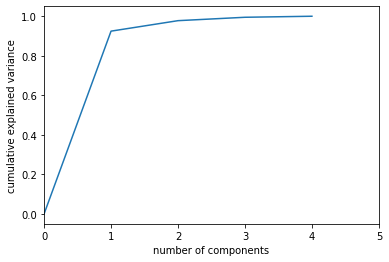

In [19]:
plt.plot(np.r_[[0],np.cumsum(pca.explained_variance_ratio_)])
plt.xlim(0,5)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### We notice that 98% proportion of variance is explained by two components. Let us see how the Iris species are explained by these two components

Text(0.5, 1.0, 'First two PCA components of the Iris dataset')

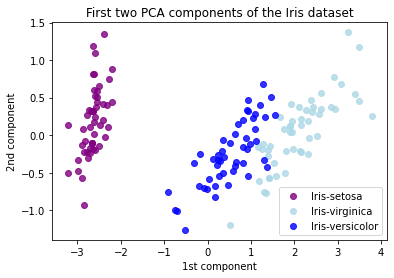

In [20]:
y = iris["Species"]
y = y.map({'Iris-setosa' : 0, 'Iris-virginica' : 1, 'Iris-versicolor':2})

X_r = pca.transform(X)

plt.scatter(X_r[y == 0, 0], X_r[y == 0, 1], alpha=.8, color = 'purple', label='Iris-setosa')
plt.scatter(X_r[y == 1, 0], X_r[y == 1, 1], alpha=.8, color = 'lightblue', label='Iris-virginica')
plt.scatter(X_r[y == 2, 0], X_r[y == 2, 1], alpha=.8, color = 'blue', label='Iris-versicolor')

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('First two PCA components of the Iris dataset')

### To getter a better understanding of interaction of the dimensions plot the first three PCA dimensions

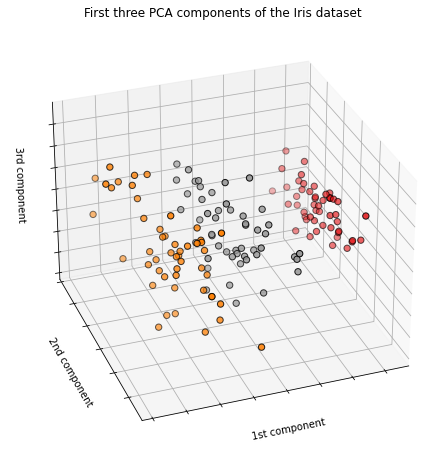

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA components of the Iris dataset")
ax.set_xlabel("1st component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd component")
ax.w_zaxis.set_ticklabels([])

plt.show()

# t-SNE on the IRIS dataset

In [23]:
# From PyPI
# !pip install tsne

# From Conda
# ! conda install -c conda-forge tsne 

# from tsne import bh_sne
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(X)

Wall time: 460 ms


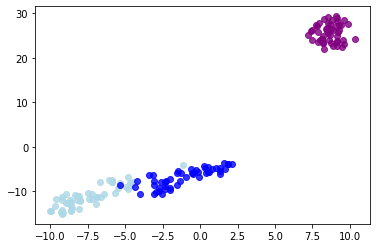

In [24]:
plt.scatter(P[y == 0, 0], P[y == 0, 1], alpha=.8, color = 'purple', label='Iris-setosa')
plt.scatter(P[y == 1, 0], P[y == 1, 1], alpha=.8, color = 'lightblue', label='Iris-virginica')
plt.scatter(P[y == 2, 0], P[y == 2, 1], alpha=.8, color = 'blue', label='Iris-versicolor')

### Run Barnes-Hut t-SNE (see https://github.com/danielfrg/tsne)

In [25]:
%time B = tsne.bh_sne(X)

NameError: name 'bh_sne' is not defined

In [ ]:
plt.scatter(B[y == 0, 0], B[y == 0, 1], alpha=.8, color = 'purple', label='Iris-setosa')
plt.scatter(B[y == 1, 0], B[y == 1, 1], alpha=.8, color = 'lightblue', label='Iris-virginica')
plt.scatter(B[y == 2, 0], B[y == 2, 1], alpha=.8, color = 'blue', label='Iris-versicolor')